# Phys 111 Final Project
## Lev Gruber, Charlie Schofield

A simplified model to study a bio-inspired triple spring mechanism. 

This jupyter notebook is arranged into the following sections:
1. **Euler-Lagrange DE and Variable Instantiation** ~ solving for both positions over time.
2. **Classical Regime and Normal Modes**
3. **Varying Mass**
4. **Varying Spring Characteristics**
4. **Surfaces of Section**


## Section 1 - Solving Euler-Lagrange DE and Variable Instantiation

In [31]:
'''

Imports and LaTex formatting

'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, odeint

plt.rcParams['text.usetex'] = True

In [32]:
# Define global constants for the system
m_1 = 1
m_2 = 2
l = 1

#linear spring constants
k_1 = 5
k_2 = 5
k_3 = 5

#quadratic spring constants
c_1 = 1
c_2 = 1
c_3 = 1

def deriv(t, q):
    '''
    Inputs: 
    - q (array): 
    - t (float): time
    Outputs:
    - [dq1_dt, dq2_dt, dq1_dot_dt, dq2_dot_dt]
    '''
    # pull out variables from input array
    q_1, q_2, v_1, v_2 = q
    
    # define derivatives
    q_1_dot = v_1
    q_2_dot = v_2
    
    # test w/ non-linear springs
    
    v_1_dot = 1/m_1 * (-k_1 * q_1 -  c_1 * q_1 ** 2 + k_2 * (q_2 - q_1) + c_2 * (q_2 - q_1)**2)
    v_2_dot = 1/m_2 * (-k_3 * q_2 - c_3 * q_2**2 - k_2 * (q_2 - q_1) - c_2 * (q_2 - q_1) **2 )
    
    return [q_1_dot, q_2_dot, v_1_dot, v_2_dot]

def hamilton_cons_2nd_order(result):
    '''
    
    For non-linear spring system w/ only quadratic term
    
    '''
    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 * l**2 * q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = (k_1 * q_1 **2)/2 + (k_3 * q_2 ** 2)/2 + (k_2 * (q_2 - q_1)**2)/2 + (c_1 * q_1 ** 3)/3 + (c_2 * (q_2 - q_1)**3)/3 + (c_3 * q_2**3)/3
    ham = kin_eng + pot_eng
    return ham


In [33]:
'''
Run this block to check Hamiltonian conservation (conservation of energy)
'''
# Instantiate initial conditions
#y0 = [0.65, 1.1, 0, 0]
y0 = [0, 0, -0.5, 0.5]
# Instantiate time span
t_start = 0.1
t_end = 100
t = np.linspace(t_start, t_end, 10000)

# solve euler-lagrange equations
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10)
#ham_result = hamilton_cons(result)
ham_result = hamilton_cons_2nd_order(result) 

# Check if the integration was successful
plt.plot(result.t, ham_result, label=r'Hamiltonian $(T + U)$')

SyntaxError: invalid syntax (3402449840.py, line 6)

In [ ]:
# Solve the system using solve_ivp
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-8)

# Check if the integration was successful
plt.plot(result.t, result.y[0], label=r'q1 (Position of $m_1$)')
plt.plot(result.t, result.y[1], label=r'q2 (Position of $m_2$)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()
# for troubleshooting
print(result.message)
print('A single point has q_1', round(result.y[0][500],3), 'q_2', round(result.y[1][500],3), 'q_1_dot', round(result.y[2][500],3), 'q_2_dot', round(result.y[3][500],3))

for i, q1_res in enumerate(result.y[0]):
    q2_res = result.y[1][i]
    if abs(q2_res - q1_res) > 1:
        print("This system became non-physical at:", result.t[i])
    

In [ ]:
plt.plot(result.y[0], m_1 * result.y[2], label=r'pos. vs. vel of $m_1$')
plt.plot(result.y[1], m_2 * result.y[3], label=r'pos. vs. vel of $m_2$')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Velocity')


## Section 2 - Classical Regime and Normal Modes

-Charlie

In [ ]:
# Define global constants for the system
m_1 = 1
m_2 = 1
l = 1

#linear spring constants
k_1 = 2
k_2 = 1
k_3 = 2

#quadratic spring constants
c_1 = 0
c_2 = 0
c_3 = 0

# Choose initial conditions
y0 = [0, 0, 0, -.5]

# Set time span
t_start = 0.1
t_end = 100
t = np.linspace(t_start, t_end, 10000)

# Solve the system using solve_ivp
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-6, atol=1e-8)

#plot phase space of our two points
print('plot the original variables we were tracking')
plt.plot(result.y[0], m_1 * result.y[2], label=r'pos. vs. vel of $m_1$')
plt.plot(result.y[1], m_2 * result.y[3], label=r'pos. vs. vel of $m_2$')
plt.title('raw results from our simulation')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()

#let's plot normal modes
#we can rip the stuff from Lec 14 notes
M = l**2 * np.array([[m_1, 0],
                     [0, m_2]])
M_inv = np.linalg.inv(M)

K = np.array([[k_1 + k_2, -k_2     ],
              [-k_2     ,  k_2 + k_3]])

eigenvalues, eigenvectors = np.linalg.eig(M_inv @ K)
print(eigenvectors)
print('values', eigenvalues)

print('now we plot the normal modes and see if we recover simple harmonic motion')

#choose new degrees of freedom
first_mode_position = eigenvectors[0][0] * result.y[0] + eigenvectors[0][1] * result.y[1]
second_mode_position = eigenvectors[1][0] * result.y[0] + eigenvectors[1][1] * result.y[1]

first_mode_momentum = eigenvectors[0][0] * m_1 * result.y[2] + eigenvectors[0][1] * m_2 * result.y[3]
second_mode_momentum = eigenvectors[1][0] * m_1 * result.y[2] + eigenvectors[1][1] * m_2 * result.y[3]

#plotting
plt.plot(first_mode_position, first_mode_momentum, label=r'pos. vs. momentum of mode 1')
plt.plot(second_mode_position, second_mode_momentum, label=r'pos. vs. momentum of mode 2')

plt.title('results in normal mode decomposition')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()

#only works for m1=m2 and k1=k3 but that's all lecture technically covered from what i can see sooooo

## Section 3 - Varying Mass
We vary one mass while keeping the other constant to analyze non-linear motion

In [57]:
def plot_motion(masses, init_cond):
    '''
    Solves DEs and plots motion
    Inputs:
    masses (floats): formatted as [[m1, m2], [m1, m2], ...]
    init_cond (floats): formatted as [[q1, q2, v1, v2], ...]
    Outputs:
    None, prints in notebook
    '''
    return 1

## Section 4 - Varying Spring Characteristics

-Charlie

## Section 5 - Surfaces of Section


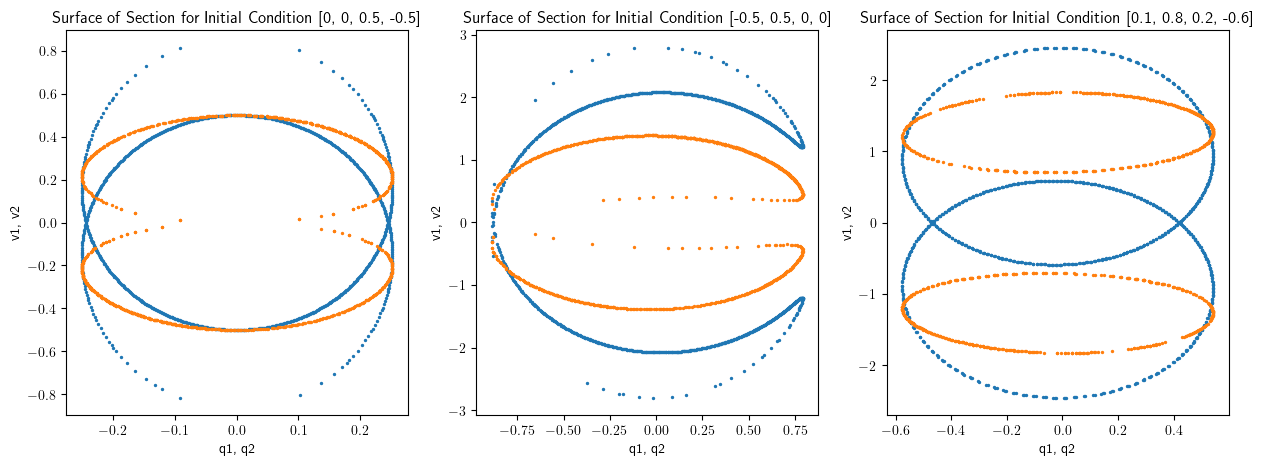

In [56]:
# instantiate a set of initial conditions ~ not currently used
init_conds = [[0, 0, 0.5, -0.5], [-0.5, 0.5, 0, 0], [0.1, 0.8, 0.2, -0.6]] #[0.65, 1.1, 0, 0], 

##### New method

def find_crossing(t_prev, y_prev, T, L):
    """
    Recursively determines the values of position and velocity when one spring passes its zero
    """
    # Solve DE for a small time chunk
    t_eval = np.linspace(t_prev, t_prev + T, 1000)
    result = solve_ivp(deriv, [t_prev, t_prev + T], y_prev, t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-10)
    
    # Check for crossing
    if (result.y[1][0] > 0 and result.y[1][-1] < 0) or (result.y[1][0] < 0 and result.y[1][-1] > 0):
        if T < 1e-6:  # Ensure the time step is small enough
            return result
        else:
            return find_crossing(t_prev, y_prev, T / 2, L / 2)
    else:  # If no crossing, advance time and keep going
        return find_crossing(t_prev + T, result.y[:, -1], T, L)

# Main loop
def find_sos(y0, hold_q2 = True):
    t_prev = 0
    sos_num = 1000
    t_sos_vals = []
    q_sos_vals = []
    v1_sos_vals = []
    v2_sos_vals = []
 
    y_prev = y0
    
    T = 1 # update with non-dimensionalized time coefficient
    L = 1
    while len(q_sos_vals) < sos_num:
        t_eval = np.linspace(t_prev, t_prev + T, 1000)
        result = solve_ivp(deriv, [t_prev, t_prev + T], y_prev, t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-10)

        # check crossing
        if hold_q2:
            # Check for crossing
            if (result.y[1][0] > 0 and result.y[1][-1] < 0) or (result.y[1][0] < 0 and result.y[1][-1] > 0):
                output = find_crossing(t_prev, y_prev, T, L)
                t_sos_vals.append(output.t[-1])
                q_sos_vals.append(output.y[0][-1])
                v1_sos_vals.append(output.y[2][-1])
                v2_sos_vals.append(output.y[3][-1])
            
        else:
            # Check for crossing
            if (result.y[0][0] > 0 and result.y[0][-1] < 0) or (result.y[0][0] < 0 and result.y[0][-1] > 0):
                output = find_crossing(t_prev, y_prev, T, L)
                t_sos_vals.append(output.t[-1])
                q_sos_vals.append(output.y[0][-1])
                v1_sos_vals.append(output.y[2][-1])
                v2_sos_vals.append(output.y[3][-1])
            
            # Update initial state for the next iteration
        t_prev = result.t[-1]
        y_prev = result.y[:, -1]
    return t_sos_vals, q_sos_vals, v1_sos_vals, v2_sos_vals

fig, axs = plt.subplots(1, len(init_conds), figsize = (15,5))
for i, y0 in enumerate(init_conds):
    t_sos_vals, q1_sos_vals, v1_sos_vals, v2_sos_vals = find_sos(y0, hold_q2=True)
    axs[i].scatter(q1_sos_vals, v1_sos_vals, s=2, label='q1 fixed')
    t_sos_vals, q_sos_vals, v1_sos_vals, v2_sos_vals = find_sos(y0, hold_q2=False)
    axs[i].scatter(q_sos_vals, v2_sos_vals, s=2)
    axs[i].set_xlabel('q1, q2')
    axs[i].set_ylabel('v1, v2')
    axs[i].set_title(f'Surface of Section for Initial Condition {y0}')



In [ ]:
'''

Neo-Hookean Spring Old Code


 # original stuff
#v_1_dot = (1)/(m_1 * l**2) * (c_1 * ( -(1+q_1) + 1/(1+q_1)**2) + c_2 * ( (1 + q_2 - q_1) - 1 / (1 + q_2 - q_1)**2 ))
# #v_2_dot = (1)/(m_2 * l**2) * (c_3 * ( -(1+q_2) + 1/(1+q_2)**2) - c_2 * ( (1 + q_2 - q_1) + 1 / (1 + q_2 - q_1)**2 ))
    
# test w/ linear springs
#v_1_dot = -2*(c_1 / m_1) * q_1 + (c_2 / m_1) * q_2
#v_2_dot = (c_1 / m_2) * q_1 - 2*(c_2 / m_2) * q_2


#didn't work but it's her
# edef hamilton_cons(result):
    
    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 *  q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = c_1 * ( ((1 + q_1)**2)/2 + 1/(1 + q_1) - 3/2) + c_2 * ( ((1+q_2-q_1)**2)/2 + 1/(1 + q_2 - q_1) - 3/2) + c_3 * ( ((1 + q_2)**2)/2 + 1/(1 + q_2) - 3/2)
    ham = kin_eng + pot_eng
    return ham

#linear springs do work
def hamilton_cons_1st_order(result):
    
    For linear spring system

    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    k = 5 #c_1
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 * l**2 * q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = k * q_1 ** 2 + k * q_2**2 - k * q_1 * q_2
    ham = kin_eng + pot_eng
    return ham
    
'''

'''

Old Surface of Section Code (functional but incredibly inefficient)
y0 = [0, 0, 0.5, -0.5]
    
# Instantiate time span
t_start = 0.1
t_end = 200
t = np.linspace(t_start, t_end, 10000000)

# solve euler-lagrange equations
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10)

# instantiate a set of initial conditions ~ not currently used
init_conds = [[0.65, 1.1, 0, 0], [0, 0, 0, 0]] 

# take only points for which x_2 is zero:
q1_sas = [[], [], [], []] #t, q1, v1, v2
for i in range(10000000):
     if abs(result.y[1][i]) < 10e-3:
         q1_sas[0].append(result.t[i])
         q1_sas[1].append(result.y[0][i])
         q1_sas[2].append(result.y[2][i])
         q1_sas[3].append(result.y[3][i])

# # take only points for which x_1 is zero:
q2_sas = [[], [], [], []] #q2, v1, v2
for i in range(10000000):
     if abs(result.y[0][i]) < 10e-3:
         q2_sas[0].append(result.t[i])
         q2_sas[1].append(result.y[1][i])
         q2_sas[2].append(result.y[2][i])
         q2_sas[3].append(result.y[3][i]) 
         
fig, ax = plt.subplots()
ax.scatter(q1_sas[1], q1_sas[2])
ax.scatter(q2_sas[1], q2_sas[2])

'''
